In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train_binary.csv')
df.head()

,imagesID,label
0,26bcc93ff.jpg,0
1,1d7fb0fa8.jpg,0
2,94dac8944.jpg,0
3,b18d448a7.jpg,0
4,08ba29346.jpg,0


In [3]:
df.shape

(12568, 2)

In [4]:
import cv2

train_paths = "train_images/"

def load_images(image_paths,df):
    loadedImages = []
    
    for img in df.imagesID:
        image = cv2.imread(train_paths+img)
        loadedImages.append(image)
    return loadedImages

train_images = load_images(train_paths,df)

(256, 1600, 3)


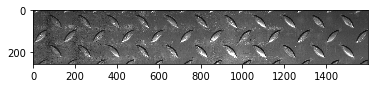

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
print(train_images[100].shape)
plt.imshow(train_images[0])

In [6]:
def resize_images(images):
    resizedimages = []  
    for img in images:  
        img = cv2.resize(img,(256,img.shape[0]))
        resizedimages.append(img)
    return resizedimages

train_images_r = resize_images(train_images)

(256, 256, 3)


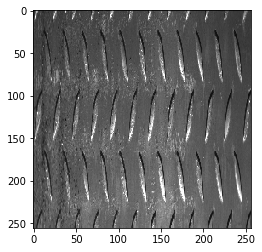

In [7]:
print(train_images_r[0].shape)
plt.imshow(train_images_r[0])

In [8]:

def features_to_np_array(images):
    imagenp = np.empty(shape = (len(images),images[0].shape[0],images[0].shape[1],images[0].shape[2]), dtype='uint8')
    idx = 0
    for img in images:
        imagenp[idx,:,:,:] = img[:,:,:]
        idx = idx+1
    imagenp = imagenp.reshape((imagenp.shape[0],imagenp.shape[1]*imagenp.shape[2]*imagenp.shape[3]))
    return imagenp
    
    
train_images = features_to_np_array(train_images_r)

In [9]:
train_images.shape

(12568, 196608)

In [10]:
y = pd.get_dummies(df.label,columns='label')
y = np.array(y)

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train_images,y,test_size = 0.2,random_state=42, stratify=y)
X_train.shape

(10054, 196608)

In [12]:
X_train_r = X_train.reshape((10054,256,256,3))
X_train_r.shape

(10054, 256, 256, 3)

In [14]:
y_test.shape

(2514, 2)

In [16]:
X_test_r = X_test.reshape((2514,256,256,3))
X_test_r.shape


(2514, 256, 256, 3)

In [17]:
import tensorflow as tf
import random as rn

# Set up your models here
# Setting the seed for numpy-generated random numbers
np.random.seed(37)

# Setting the seed for python random numbers
rn.seed(1254)

# Setting the graph-level random seed.
tf.random.set_seed(89)

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

model = Sequential()
#model_28.add(Dense(128,input_dim = 784,activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), input_shape= (256,256,3), border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

C:\Users\DEEPAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(3, 3), input_shape=(256, 256,..., activation="relu", padding="same")`
C:\Users\DEEPAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
C:\Users\DEEPAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
C:\Users\DEEPAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu", padding="same")`


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 256)      

In [18]:
model.fit(X_train_r,y_train,epochs=2,batch_size=128)

Epoch 1/2
10054/10054 [==============================] - 3998s 398ms/step - loss: 4.0791 - accuracy: 0.6651


C:\Users\DEEPAK\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (17.943060). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


Epoch 2/2
10054/10054 [==============================] - 4479s 446ms/step - loss: 0.4358 - accuracy: 0.7890


In [19]:
model.evaluate(X_test_r, y_test)

2514/2514 [==============================] - 124s 49ms/step


[0.43408627510544984, 0.7893794775009155]